In [1]:
from collections import defaultdict
from conceptnet import ConceptNet
import utils

wrapper = ConceptNet()
huric_utils = utils.HuricUtils()
language_utils = utils.LanguageUtils('en')
graph_utils = utils.GraphUtils()

['/c/en/book', '/c/en/towel', '/c/en/mug', '/c/en/bed']
all types {'/c/en/area/n', '/c/en/quantity/n', '/c/en/work/n', '/c/en/product/n', '/c/en/slice/n', '/c/en/publication/n', '/c/en/chemical/n', '/c/en/section/n', '/c/en/commercial_enterprise/n', '/c/en/creation/n', '/c/en/group/n', '/c/en/segment/n', '/c/en/square_mile/n', '/c/en/team/n', '/c/en/writing/n', '/c/en/communication/n', '/c/en/musical_organization/n', '/c/en/consequence/n', '/c/en/music/n', '/c/en/part/n', '/c/en/book', '/c/en/army_unit/n', '/c/en/collection/n'}
all types {'/c/en/towel', '/c/en/piece_of_cloth/n', '/c/en/fabric/n'}
all types {'/c/en/mug', '/c/en/indefinite_quantity/n', '/c/en/containerful/n'}
all types {'/c/en/artifact/n', '/c/en/layer/n', '/c/en/tract/n', '/c/en/foundation/n', '/c/en/stratum/n', '/c/en/geological_formation/n', '/c/en/financial_institution/n', '/c/en/surface/n', '/c/en/relation/n', '/c/en/scheme/n', '/c/en/subpopulation/n', '/c/en/chart/n', '/c/en/plot/n', '/c/en/natural_depression/n', '

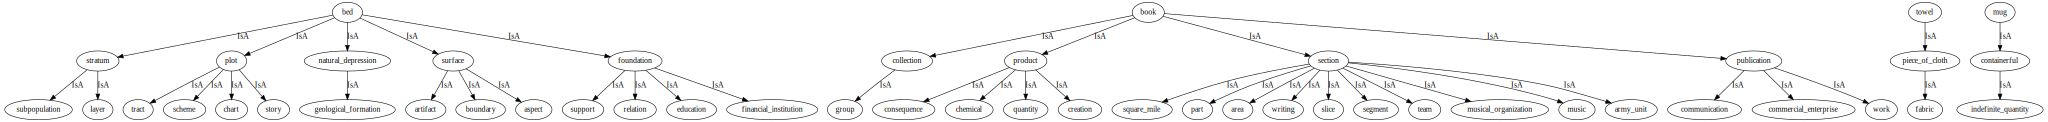

In [2]:
things = ['book', 'bath towel', 'coffee mug', 'bed']
things = [language_utils.semantic_head_lemmatize(el) for el in things]
things = [wrapper.get_id(el) for el in things]
print(things)
# follow triples [current_words], IsA, ?
all_edges = set()
for w in things:
    all_types, edges = wrapper.get_isa_tree(w)
    print('all types', all_types)
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [3]:
frame_elements = huric_utils.get_frame_elements_values('Theme')
frame_lemmas = set()
for el in frame_elements:
    lemma = language_utils.semantic_head_lemmatize(el)
    #print(el, ':', lemma)
    frame_lemmas.add(lemma)

cushion /c/en/cushion {'/c/en/artifact/n', '/c/en/region/n', '/c/en/layer/n', '/c/en/cushion', '/c/en/structure/n', '/c/en/hen/n', '/c/en/padding/n'}
message /c/en/message {'/c/en/message', '/c/en/act/n', '/c/en/communication/n', '/c/en/connection/n', '/c/en/abstraction/n'}
magazine /c/en/magazine {'/c/en/press/n', '/c/en/publisher/n', '/c/en/quantity/n', '/c/en/machine/n', '/c/en/professional/n', '/c/en/work/n', '/c/en/product/n', '/c/en/push/n', '/c/en/publication/n', '/c/en/chemical/n', '/c/en/depository/n', '/c/en/magazine', '/c/en/supply_chamber/n', '/c/en/commercial_enterprise/n', '/c/en/creation/n', '/c/en/estate/n', '/c/en/storehouse/n', '/c/en/communication/n', '/c/en/consequence/n', '/c/en/clamp/n', '/c/en/weightlifting/n', '/c/en/firm/n', '/c/en/owner/n', '/c/en/mechanical_device/n', '/c/en/print_media/n'}
eyeglass /c/en/eyeglass {'/c/en/eyeglass'}
some /c/en/some {'/c/en/some'}
pasta /c/en/pasta {'/c/en/containerful/n', '/c/en/container/n', '/c/en/food/n', '/c/en/pasta', '/

box /c/en/box {'/c/en/instrumentality/n', '/c/en/area/n', '/c/en/extent/n', '/c/en/woody_plant/n', '/c/en/box', '/c/en/region/n', '/c/en/topic/n', '/c/en/containerful/n', '/c/en/container/n', '/c/en/cloth_covering/n', '/c/en/indefinite_quantity/n', '/c/en/stroke/n', '/c/en/room/n', '/c/en/location/n', '/c/en/seat/n', '/c/en/legal_right/n', '/c/en/exhalation/n', '/c/en/blow/n', '/c/en/structure/n', '/c/en/body_part/n', '/c/en/rectangle/n', '/c/en/compartment/n', '/c/en/furniture/n', '/c/en/shrub/n', '/c/en/part/n', '/c/en/space/n', '/c/en/center/n', '/c/en/support/n'}
radio /c/en/radio {'/c/en/radio', '/c/en/facility/n', '/c/en/system/n', '/c/en/broadcasting/n', '/c/en/telecommunication/n', '/c/en/communication_system/n'}
tub /c/en/tub {'/c/en/tube/n', '/c/en/containerful/n', '/c/en/container/n', '/c/en/indefinite_quantity/n', '/c/en/vessel/n', '/c/en/tub', '/c/en/craft/n'}
slipper /c/en/slipper {'/c/en/slipper', '/c/en/footwear/n', '/c/en/clothing/n', '/c/en/covering/n'}
rag /c/en/rag 

tablet /c/en/tablet {'/c/en/slab/n', '/c/en/block/n', '/c/en/tablet', '/c/en/baked_goods/n', '/c/en/cake/n'}


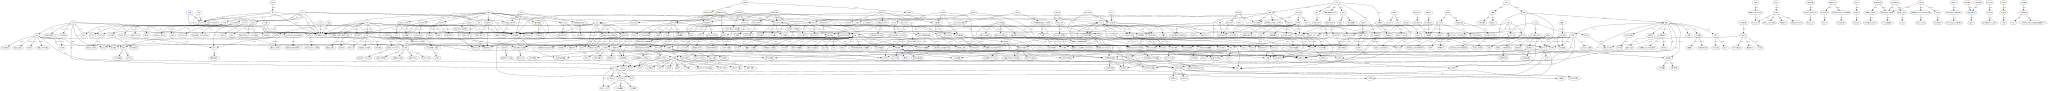

In [4]:
all_hypernyms = defaultdict(lambda: 0)
all_edges = set()
for w in frame_lemmas:
    id = wrapper.get_id(w)
    hypernyms, edges = wrapper.get_isa_tree(id)
    print(w, id, hypernyms)
    for w in hypernyms:
        all_hypernyms[w] += 1
    all_edges.update(edges)

graph_utils.create_graph(all_edges, wrapper.get_name)

In [5]:
sorted_hypernyms = sorted([(k,v) for k,v in all_hypernyms.items()], key=lambda el: el[1], reverse=True)
print(sorted_hypernyms)

[('/c/en/container/n', 18), ('/c/en/containerful/n', 16), ('/c/en/indefinite_quantity/n', 14), ('/c/en/instrumentality/n', 10), ('/c/en/artifact/n', 8), ('/c/en/food/n', 6), ('/c/en/act/n', 5), ('/c/en/communication/n', 5), ('/c/en/solid/n', 5), ('/c/en/substance/n', 5), ('/c/en/covering/n', 5), ('/c/en/vessel/n', 5), ('/c/en/layer/n', 4), ('/c/en/consequence/n', 4), ('/c/en/medium/n', 4), ('/c/en/tableware/n', 4), ('/c/en/part/n', 4), ('/c/en/tube/n', 4), ('/c/en/craft/n', 4), ('/c/en/structure/n', 3), ('/c/en/abstraction/n', 3), ('/c/en/quantity/n', 3), ('/c/en/machine/n', 3), ('/c/en/work/n', 3), ('/c/en/product/n', 3), ('/c/en/publication/n', 3), ('/c/en/chemical/n', 3), ('/c/en/creation/n', 3), ('/c/en/content/n', 3), ('/c/en/foodstuff/n', 3), ('/c/en/material/n', 3), ('/c/en/fitting/n', 3), ('/c/en/line/n', 3), ('/c/en/plant_part/n', 3), ('/c/en/receptacle/n', 3), ('/c/en/support/n', 3), ('/c/en/plot/n', 3), ('/c/en/device/n', 3), ('/c/en/wrapping/n', 3), ('/c/en/fabric/n', 3), (